In [56]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("../hukd_5000_pages.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32407 entries, 0 to 32406
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item     31980 non-null  object
 1   Price    31980 non-null  object
 2   Company  31980 non-null  object
 3   Heat     32407 non-null  object
 4   Date     32407 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [4]:
df.columns

Index(['Item', 'Price', 'Company', 'Heat', 'Date'], dtype='object')

In [5]:
df.head()

,Item,Price,Company,Heat,Date
0,Used Samsung Galaxy S10+ Plus Prism Black Voda...,£323.18,eBay Deals,102°,Made hot 13 m ago
1,Good deals at Dixons travel - ie iPad 12.9 3rd...,Dixons Travel Deals,Dixons Travel Deals,115°,Local
2,4TB SSD SanDisk Ultra 3D - £330.10 (£320 with ...,£330.10,Amazon France Deals,178°,Made hot 42 m ago
3,"Microsoft Surface Laptop 3, Intel Core i5 Proc...",£779,John Lewis Deals,165°,Made hot 55 m ago
4,"New Apple Watch Series 6 (GPS, 40mm) - Space G...",£360.05,Amazon Deals,349°,"Made hot 2 h, 28 m ago"


In [78]:
def clean_date(date_entry):
    temp = date_entry.split()
    if temp[-1] == "ago":
        # return dt.datetime.today().strftime("%d/%m/%Y")
        return pd.to_datetime("2020-10-15")
    elif temp[0] == "Made":
        return parse(" ".join(temp[-2:]))
    else:
        return np.nan


def clean_company(company_entry):
    # reverse split to split by last space symbol
    try:
        return company_entry.rsplit(" ", 1)[0]
    except:
        return np.nan


def clean_price(price_entry):
    try:
        temp = price_entry[1:]
        temp = temp.replace(",", "")
        return round(float(temp))
    except:
        return np.nan


def clean_heat(heat_entry):
    temp = heat_entry[:-1]
    try:
        return int(temp)
    except:
        return np.nan


def clean_item(item_entry):
    # take out price from title
    # filter returns element for which condition is true
    lst = ["prime", "black", "delivered", "code"]
    res = " ".join(filter(lambda x: x[0] != "£", item_entry.split()))
    res = " ".join(filter(lambda x: x not in lst, res.split()))
    return res


def get_top_twenty_words(df, n_comp):
    """
    Takes dataframe of text (title, description, key ingredient) and uses truncated SVD to reduce down to n components
    """
    vectorizer = TfidfVectorizer(stop_words="english", strip_accents="unicode")
    vec = vectorizer.fit_transform(df)
    tfidf = pd.DataFrame(vec.todense(), columns=vectorizer.get_feature_names())
    svd = TruncatedSVD(n_components=n_comp, n_iter=7, random_state=42)
    svd_ft = svd.fit_transform(tfidf)
    df_comp = pd.DataFrame(svd.components_, columns=tfidf.columns)
    df_comp = df_comp.T
    return np.mean(df_comp.abs(), axis=1).sort_values(ascending=False).head(30)

# Clean item
#df['Item'] = df['Item'].map(lambda x: clean_item(x))
# Clean price
df['Price'] = df['Price'].map(lambda x: clean_price(x))
# Clean company
df['Company'] = df['Company'].map(lambda x: clean_company(x))
# Clean date
df['Date'] = df['Date'].map(lambda x: clean_date(x))
# Clean heat
df['Heat'] = df['Heat'].map(lambda x: clean_heat(x))


In [79]:
# The 50 most frequent companies appearing in the website
n=50
FreqCompanies=(df['Company'].value_counts()[:n].index.tolist())
print(FreqCompanies)
Frequencies=np.array(df['Company'].value_counts()[:n].tolist())
print(Frequencies)

['Amazon', 'eBay', 'Currys PC World', 'AliExpress', 'Argos', 'John Lewis', 'Richer Sounds', 'Amazon Germany', 'CCLOnline', 'Costco', 'MyMemory', 'Laptops Direct', 'Box.co.uk', 'ao.com', 'Google Play', 'Ebuyer', 'Lenovo UK', 'Amazon Spain', 'Scan', 'Very', 'Samsung', 'GearBest', 'BT Shop', 'Amazon Italy', 'PicStop', 'eGlobal Central', 'CeX', 'Tesco', 'Western Digital Shop', 'O2 Shop', 'Wowcamera', 'Amazon France', 'Xiaomi UK', 'Dell', 'Base.com', 'iOS App Store', 'AWD-IT', 'Huawei Store', 'Carphone Warehouse', 'Overclockers', '7dayShop', 'PRC Direct', 'ITZOO', 'Peter Tyson Audio Visual', 'Aria PC', 'Robert Dyas', 'Centres Direct', 'RGB Direct', 'Hughes', 'Screwfix']
[8565 5442 1607  982  840  720  627  575  495  462  437  394  376  376
  319  317  295  292  273  260  254  230  210  175  174  172  172  169
  165  152  147  138  137  137  134  130  127  122  107  106  105  104
  101  100   99   97   91   89   88   85]


In [80]:
# selecting companies with at least 100 or more deals
Frequencies=Frequencies[Frequencies>100]
FreqCompanies=FreqCompanies[0:len(Frequencies)]
print(FreqCompanies)
print(Frequencies)

['Amazon', 'eBay', 'Currys PC World', 'AliExpress', 'Argos', 'John Lewis', 'Richer Sounds', 'Amazon Germany', 'CCLOnline', 'Costco', 'MyMemory', 'Laptops Direct', 'Box.co.uk', 'ao.com', 'Google Play', 'Ebuyer', 'Lenovo UK', 'Amazon Spain', 'Scan', 'Very', 'Samsung', 'GearBest', 'BT Shop', 'Amazon Italy', 'PicStop', 'eGlobal Central', 'CeX', 'Tesco', 'Western Digital Shop', 'O2 Shop', 'Wowcamera', 'Amazon France', 'Xiaomi UK', 'Dell', 'Base.com', 'iOS App Store', 'AWD-IT', 'Huawei Store', 'Carphone Warehouse', 'Overclockers', '7dayShop', 'PRC Direct', 'ITZOO']
[8565 5442 1607  982  840  720  627  575  495  462  437  394  376  376
  319  317  295  292  273  260  254  230  210  175  174  172  172  169
  165  152  147  138  137  137  134  130  127  122  107  106  105  104
  101]


/home/itp/adhar/work/courses/S2DS/HoteDeals/Deal_Searcher/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'eBay')

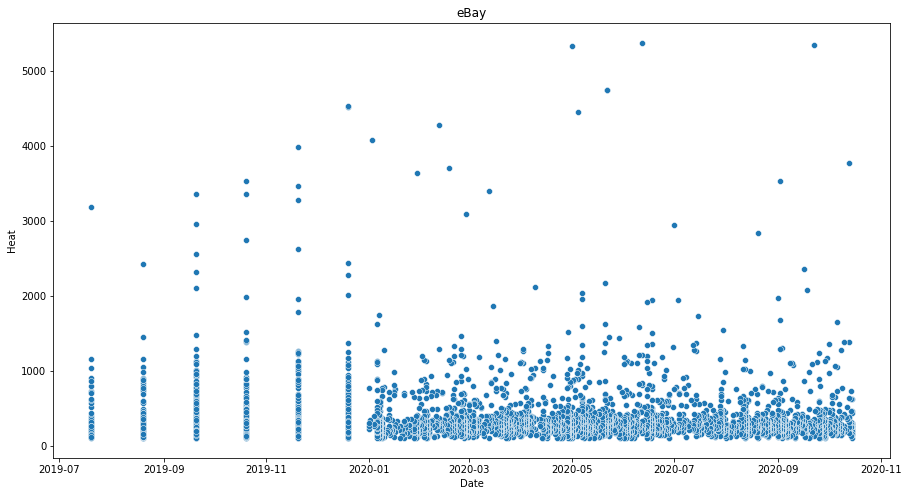

In [81]:
# plotting the heat of the deals from the companies as a function of time
index=1
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(df.loc[df['Company']==FreqCompanies[index]]['Date'], df.loc[df['Company']==FreqCompanies[index]]['Heat'])
plt.title(FreqCompanies[index])